In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-eligible-dataset/loan-train.csv
/kaggle/input/loan-eligible-dataset/loan-test.csv


In [2]:
x = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-train.csv")
y = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-test.csv")

*Let's get a idea of what actually the data is !!!*

In [3]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


*A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis)*

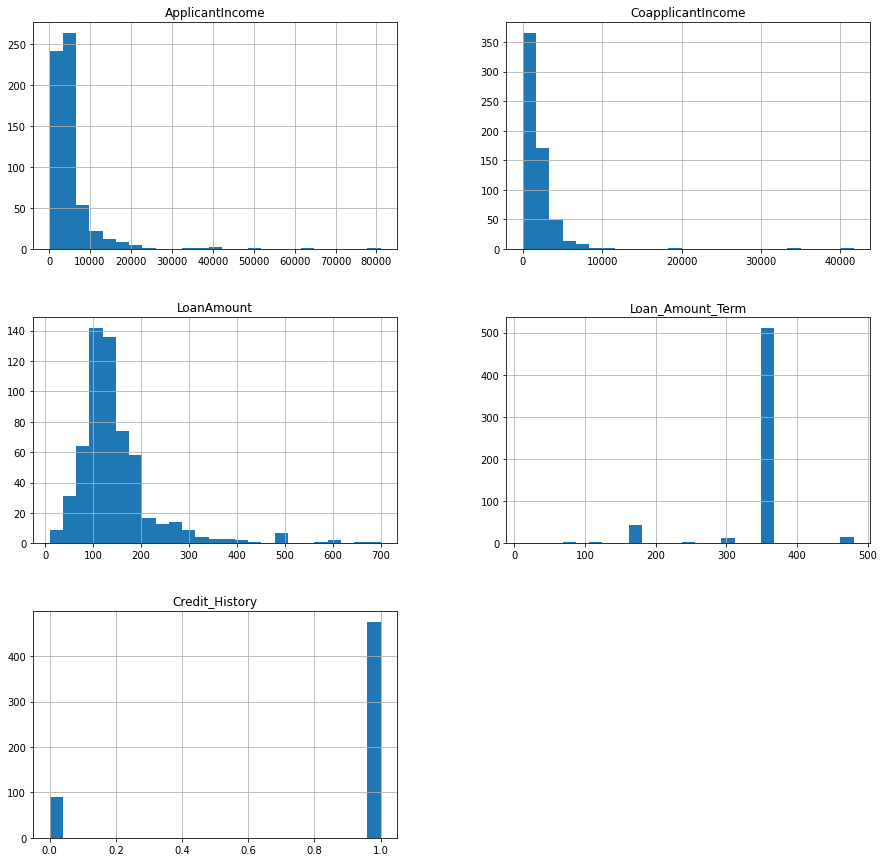

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
x.hist(bins=25, figsize=(15,15))
plt.show()


In [6]:
# creating a dict file 
Loan_Status = {'Y': 1,'N': 0}

# traversing through dataframe
# Gender column and writing
# values where key matches
x.Loan_Status = [Loan_Status[item] for item in x.Loan_Status]

x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [7]:
Education = {"Graduate" : 1,"Not Graduate":0}
x.Education = [Education[item] for item in x.Education]

x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
Education = {"Graduate" : 1,"Not Graduate":0}
y.Education = [Education[item] for item in y.Education]
y.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,1,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,1,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,1,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,1,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,0,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
x.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

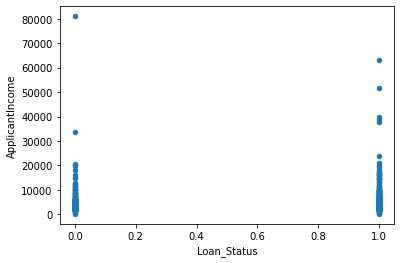

In [10]:
x.plot(kind = "scatter" , x = "Loan_Status" , y = "ApplicantIncome" )

 *As we can see the probability of getting loan  accepted has higher income.*

## Looking for Correlations

In [11]:
corr_matrix =x.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561678
Education            0.085884
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

*When it is close to 1, it means that
there is a strong positive correlation; for example, the loan status value tends to go
up when the credit history goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation*

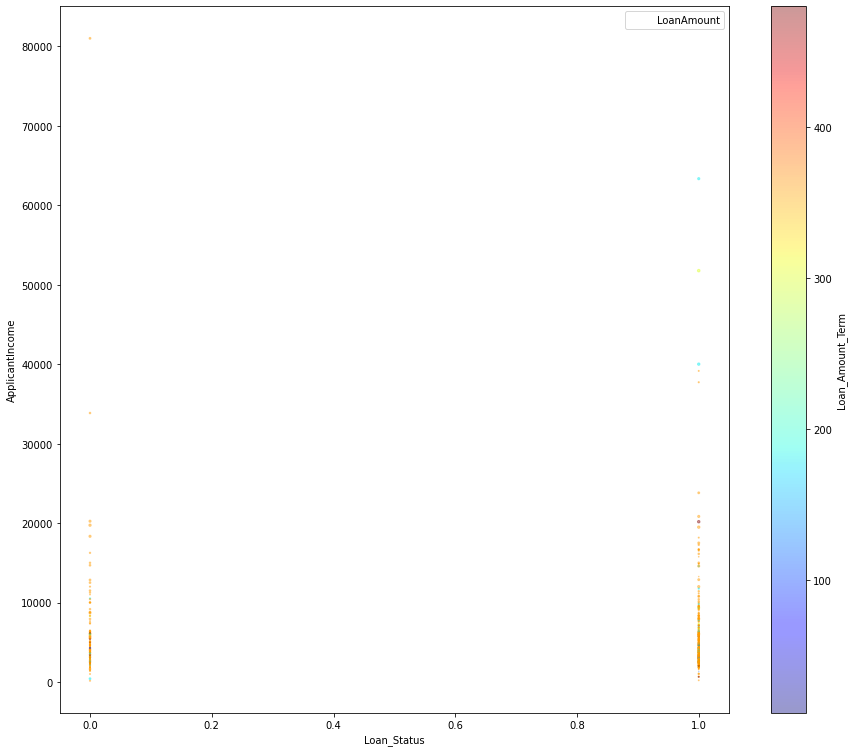

In [12]:

x.plot(kind="scatter", x="Loan_Status", y="ApplicantIncome", alpha=0.4,
             s=x["LoanAmount"]/100, label="LoanAmount", figsize=(15,13),
             c="Loan_Amount_Term", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


array([[<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Status'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>],
       [<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>],
       [<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>,
        <

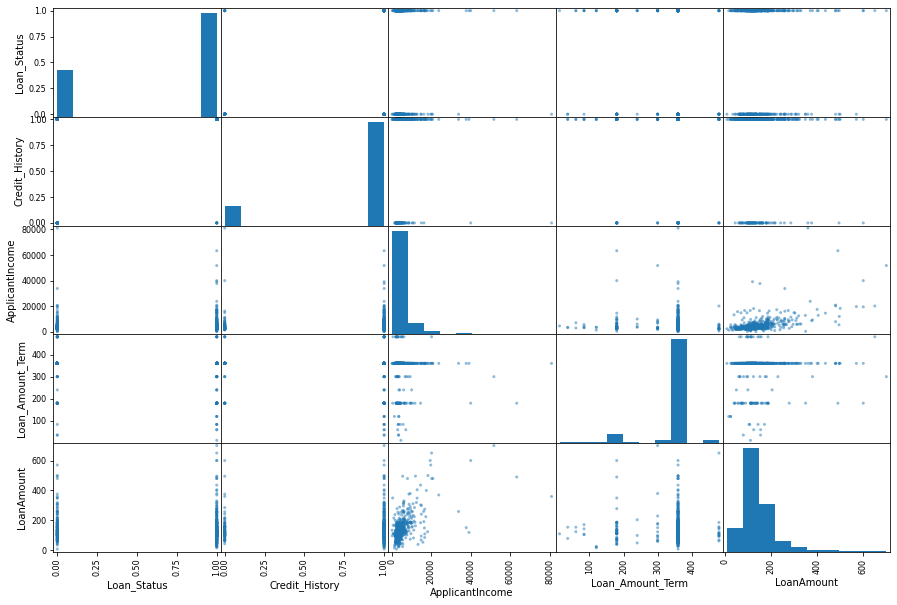

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Loan_Status",         
"Credit_History",      
"ApplicantIncome",     
"Loan_Amount_Term",   
"LoanAmount"]
scatter_matrix(x[attributes], figsize=(15, 10))


## **Data Cleaning** 

*Vizualizing missing data*

In [14]:
x.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

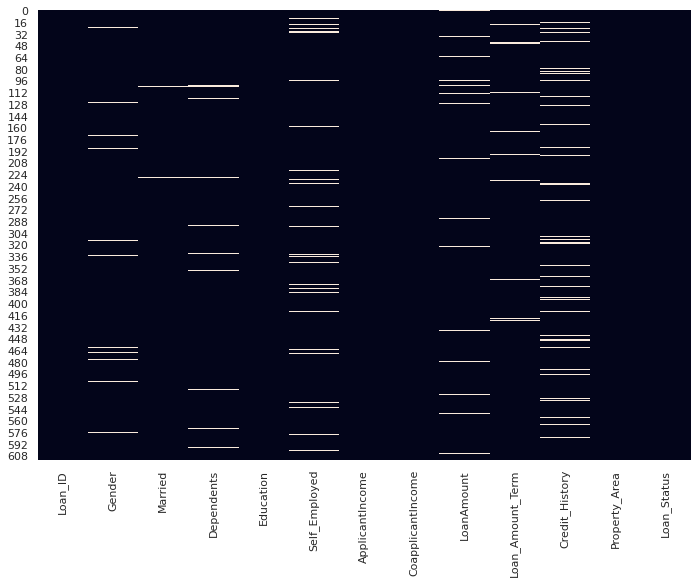

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(x.isnull(), cbar=False)

In [16]:
x.Gender = x.Gender.replace({"Male": 1, "Female" : 0})
y.Gender = y.Gender.replace({"Male": 1, "Female" : 0})

x.Married = x.Married.replace({"Yes": 1, "No" : 0})
y.Married = y.Married.replace({"Yes": 1, "No" : 0})

x.Self_Employed = x.Self_Employed.replace({"Yes": 1, "No" : 0})
y.Self_Employed = y.Self_Employed.replace({"Yes": 1, "No" : 0})

In [17]:
x.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

*Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute*

In [19]:
df = x.drop(["Property_Area","Loan_ID","Dependents","CoapplicantIncome"], axis=1)

In [20]:
y_df = y.drop(["Property_Area","Loan_ID","Dependents"], axis=1)

In [21]:
y_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1,1,0.0,5720,0,110.0,360.0,1.0
1,1.0,1,1,0.0,3076,1500,126.0,360.0,1.0
2,1.0,1,1,0.0,5000,1800,208.0,360.0,1.0
3,1.0,1,1,0.0,2340,2546,100.0,360.0,NaN
4,1.0,0,0,0.0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...
362,1.0,1,0,1.0,4009,1777,113.0,360.0,1.0
363,1.0,1,1,0.0,4158,709,115.0,360.0,1.0
364,1.0,0,1,0.0,3250,1993,126.0,360.0,NaN
365,1.0,1,1,0.0,5000,2393,158.0,360.0,1.0


In [22]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,1,0.0,5849,NaN,360.0,1.0,1
1,1.0,1.0,1,0.0,4583,128.0,360.0,1.0,0
2,1.0,1.0,1,1.0,3000,66.0,360.0,1.0,1
3,1.0,1.0,0,0.0,2583,120.0,360.0,1.0,1
4,1.0,0.0,1,0.0,6000,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,71.0,360.0,1.0,1
610,1.0,1.0,1,0.0,4106,40.0,180.0,1.0,1
611,1.0,1.0,1,0.0,8072,253.0,360.0,1.0,1
612,1.0,1.0,1,0.0,7583,187.0,360.0,1.0,1


In [23]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [24]:
imputer.fit(y_df)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_


array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.786e+03, 1.025e+03,
       1.250e+02, 3.600e+02, 1.000e+00])

In [26]:
X = imputer.transform(df)
X

array([[  1.,   0.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  0.,   0.,   1., ..., 360.,   0.,   0.]])

In [27]:
Y = imputer.transform(y_df)
Y

array([[  1.,   1.,   1., ..., 110., 360.,   1.],
       [  1.,   1.,   1., ..., 126., 360.,   1.],
       [  1.,   1.,   1., ..., 208., 360.,   1.],
       ...,
       [  1.,   0.,   1., ..., 126., 360.,   1.],
       [  1.,   1.,   1., ..., 158., 360.,   1.],
       [  1.,   0.,   1., ...,  98., 180.,   1.]])

In [28]:
df1 = pd.DataFrame(X, columns=df.columns)
df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,1.0,0.0,5849.0,1025.0,360.0,1.0,1.0
1,1.0,1.0,1.0,0.0,4583.0,128.0,360.0,1.0,0.0
2,1.0,1.0,1.0,1.0,3000.0,66.0,360.0,1.0,1.0
3,1.0,1.0,0.0,0.0,2583.0,120.0,360.0,1.0,1.0
4,1.0,0.0,1.0,0.0,6000.0,141.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1.0,0.0,2900.0,71.0,360.0,1.0,1.0
610,1.0,1.0,1.0,0.0,4106.0,40.0,180.0,1.0,1.0
611,1.0,1.0,1.0,0.0,8072.0,253.0,360.0,1.0,1.0
612,1.0,1.0,1.0,0.0,7583.0,187.0,360.0,1.0,1.0


In [29]:
y_df1 =  pd.DataFrame(Y, columns=y_df.columns)
y_df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1.0,1.0,0.0,5720.0,0.0,110.0,360.0,1.0
1,1.0,1.0,1.0,0.0,3076.0,1500.0,126.0,360.0,1.0
2,1.0,1.0,1.0,0.0,5000.0,1800.0,208.0,360.0,1.0
3,1.0,1.0,1.0,0.0,2340.0,2546.0,100.0,360.0,1.0
4,1.0,0.0,0.0,0.0,3276.0,0.0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,0.0,1.0,4009.0,1777.0,113.0,360.0,1.0
363,1.0,1.0,1.0,0.0,4158.0,709.0,115.0,360.0,1.0
364,1.0,0.0,1.0,0.0,3250.0,1993.0,126.0,360.0,1.0
365,1.0,1.0,1.0,0.0,5000.0,2393.0,158.0,360.0,1.0


*Now all numerical attributes in the training set and test set has been handled*

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(x.Property_Area)
le.fit(y.Property_Area)

LabelEncoder()

In [31]:
df1 = df1.join([x.Property_Area,x.Dependents])

In [32]:
df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area,Dependents
0,1.0,0.0,1.0,0.0,5849.0,1025.0,360.0,1.0,1.0,Urban,0
1,1.0,1.0,1.0,0.0,4583.0,128.0,360.0,1.0,0.0,Rural,1
2,1.0,1.0,1.0,1.0,3000.0,66.0,360.0,1.0,1.0,Urban,0
3,1.0,1.0,0.0,0.0,2583.0,120.0,360.0,1.0,1.0,Urban,0
4,1.0,0.0,1.0,0.0,6000.0,141.0,360.0,1.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1.0,0.0,2900.0,71.0,360.0,1.0,1.0,Rural,0
610,1.0,1.0,1.0,0.0,4106.0,40.0,180.0,1.0,1.0,Rural,3+
611,1.0,1.0,1.0,0.0,8072.0,253.0,360.0,1.0,1.0,Urban,1
612,1.0,1.0,1.0,0.0,7583.0,187.0,360.0,1.0,1.0,Urban,2


In [33]:
y_df1 = y_df1.join([y.Property_Area,y.Dependents])

In [34]:
y_df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,1.0,1.0,1.0,0.0,5720.0,0.0,110.0,360.0,1.0,Urban,0
1,1.0,1.0,1.0,0.0,3076.0,1500.0,126.0,360.0,1.0,Urban,1
2,1.0,1.0,1.0,0.0,5000.0,1800.0,208.0,360.0,1.0,Urban,2
3,1.0,1.0,1.0,0.0,2340.0,2546.0,100.0,360.0,1.0,Urban,2
4,1.0,0.0,0.0,0.0,3276.0,0.0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,0.0,1.0,4009.0,1777.0,113.0,360.0,1.0,Urban,3+
363,1.0,1.0,1.0,0.0,4158.0,709.0,115.0,360.0,1.0,Urban,0
364,1.0,0.0,1.0,0.0,3250.0,1993.0,126.0,360.0,1.0,Semiurban,0
365,1.0,1.0,1.0,0.0,5000.0,2393.0,158.0,360.0,1.0,Rural,0


### Data Vizualisation 

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ls_with_se =df1.groupby(by =['Loan_Status','Self_Employed'])['Dependents'].count().to_frame().reset_index().rename(columns={'Loan_Status':'Loan_Status','Self_Employed':'Self_Employed','Dependents': "counts"})



In [36]:
ls_with_se

,Loan_Status,Self_Employed,counts
0,0.0,0.0,161
1,0.0,1.0,25
2,1.0,0.0,358
3,1.0,1.0,55


In [37]:
fig = px.bar(ls_with_se, x="Loan_Status", y="counts", color="Self_Employed")

fig.update_layout(title_text='Self Employed Count With loan_status',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="Red",
                  font_size=16,
                  font_family="TimesNewRoman",
                                
     )
  )
fig.show()

***As we can see if a person is employed the percentage of getting loan is high !!!***

In [38]:
fig = px.scatter(df1, x='ApplicantIncome', y='LoanAmount',color="Loan_Status")
fig.update_layout(title='Applicant Income Vs Loan Amount With Loan Status ',
                  xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

In [39]:
df_M_and_G_and_E=df1.groupby(by =['Loan_Status','Education'])['Dependents'].count().to_frame().reset_index().rename(columns={'Education':'Education','Loan_Status':'Loan_Status','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Loan_Status", y="count", color="Education", barmode="group")

fig.update_layout(xaxis_title="Education",yaxis_title="Count")
fig.show()

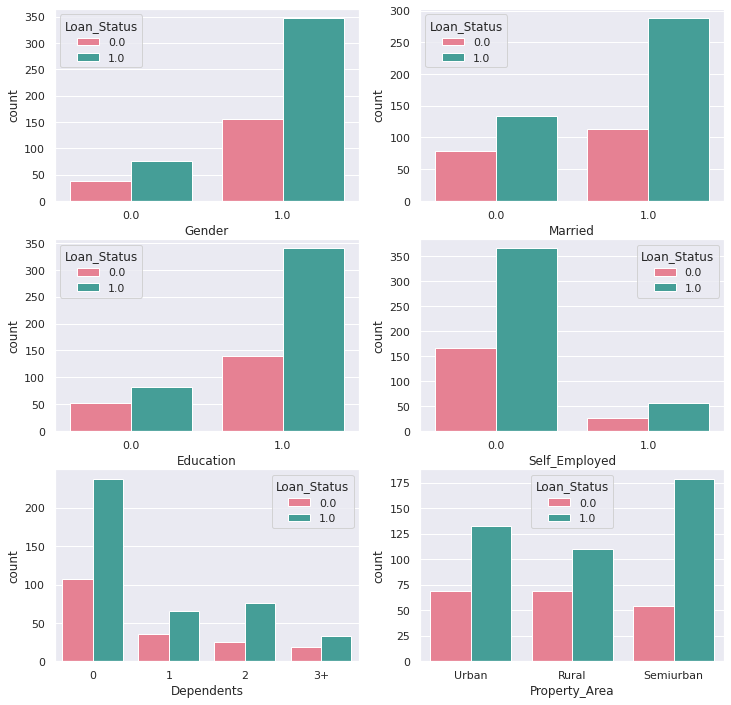

In [40]:
groups = ['Gender','Married','Education','Self_Employed','Dependents','Property_Area']
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.countplot(x = group, hue = 'Loan_Status',ax=axs[i], data=df1,palette="husl")

### Applying Machine Learning

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [42]:
tf = ['Credit_History', 'Education','Self_Employed','ApplicantIncome']

In [43]:
x_train = df1[tf].values
y_train = df1['Loan_Status'].values

x_test = y_df1[tf].values

In [44]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [45]:
predicted = lin_reg.predict(x_test)

In [46]:
print('Coefficient of model :', lin_reg.coef_)
print('\nIntercept of model',lin_reg.intercept_)

Coefficient of model : [ 1.78905414e-04  1.00158525e-01 -3.89463140e-03 -1.18417984e-06]

Intercept of model 0.6105322023419812


In [47]:
# accuracy_train = accuracy_score(x_test, predicted)
score = lin_reg.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.00910420416688229
accuracy_score percent : 0.91


*It looks like linear model done pretty bad performance*

In [48]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [49]:
rc.fit(x_train,y_train)
predicted_rc = rc.predict(x_test)

In [50]:
score = rc.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.9788273615635179
accuracy_score percent : 97.88


*Random Forest classifier has done a good job with **97.39%** accuracy.*

### *Thanks for vieweing this far Kindly Share your thoughts and upvote ☺*